## **Import libraries**

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Activation, Input, Flatten, Rescaling
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

from keras.callbacks import History 


## **Download the dataset**

Download and extract the dataset from the below link in a folder.

https://drive.google.com/file/d/1SCpVEdJ6_YOAcy2iW05ENlMh-OCcFz3P/view?usp=sharing

## **Read image files from directory**

To be familiar with keras dataset loading and preprocessing you can use the below link:

https://keras.io/api/preprocessing/image/

Please set ***validation_split = 0.2***

In [2]:
train_ds = keras.preprocessing.image_dataset_from_directory(directory='dataset/',color_mode='grayscale',validation_split=0.2,subset='training',seed=1377)
val_ds   = keras.preprocessing.image_dataset_from_directory(directory='dataset/',color_mode='grayscale',validation_split=0.2,subset='validation',seed=1377)

Found 3000 files belonging to 2 classes.
Using 2400 files for training.
Found 3000 files belonging to 2 classes.
Using 600 files for validation.


## **Display the dataset**

Plot some samples from the dataset to see and know what are you working with. 

In [13]:
train_ds.class_names

['no', 'yes']

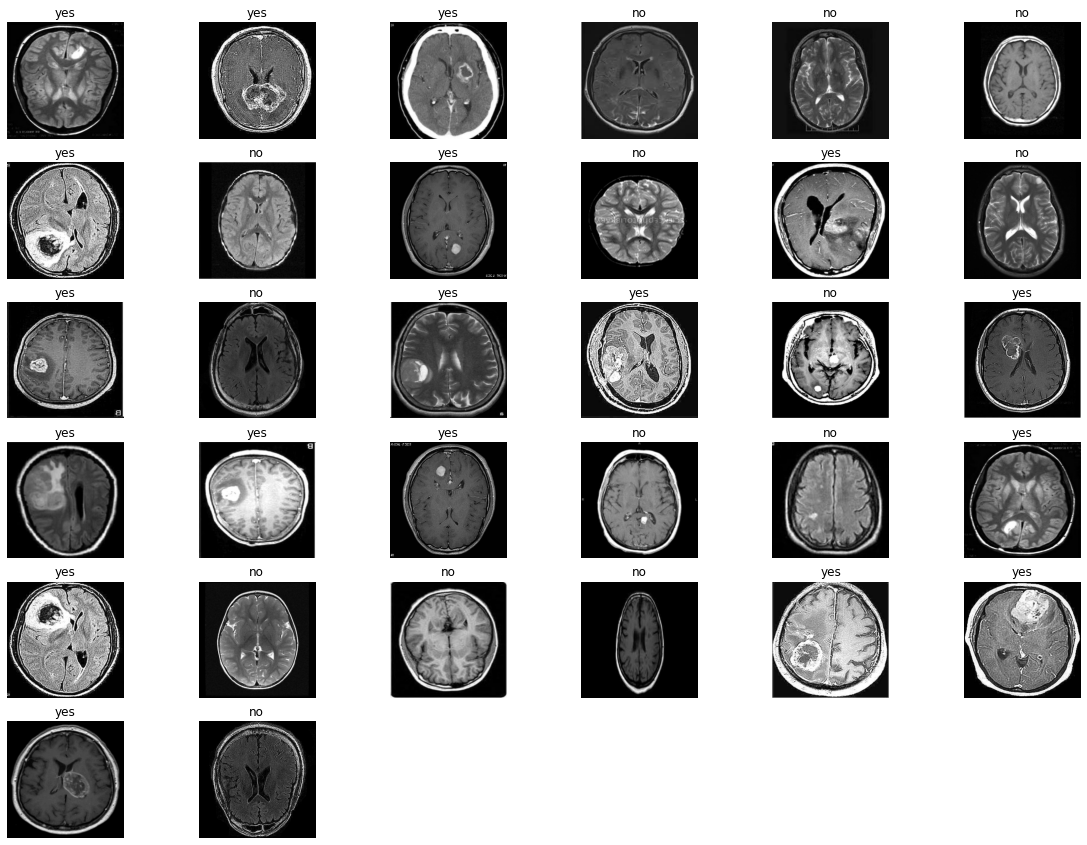

In [21]:
plt.figure(figsize=(20, 15))
class_names = train_ds.class_names
for images, labels in train_ds.take(1):
    for i in range(32):
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"),cmap='gray')
        plt.title(class_names[labels[i]])
        plt.axis("off")

## **Build the models**

In this section you will build the model with two approaches. 
First you should build it with the Sequential API and then you have to work with the Functional API in the second part. 

You can use the below link to know more about these two APIs.

Keep the architecture as simple as possible.

https://medium.com/analytics-vidhya/keras-model-sequential-api-vs-functional-api-fc1439a6fb10

<h3 style="color:red;">Reference Article</h3>
<a href="https://www.mdpi.com/2313-433X/7/12/269/pdf">Download link</a>

## **1.Sequential API**

### **Build a model**

In [12]:
model = Sequential()
model.add(Input(shape=(256,256,1)))
model.add(Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),activation='relu'))
model.add(Conv2D(filters=16,kernel_size=(3,3),strides=(1,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 32)      320       
                                                                 
 conv2d_5 (Conv2D)           (None, 252, 252, 16)      4624      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 126, 126, 16)     0         
 2D)                                                             
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 63, 16)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 63504)             0         
                                                                 
 dense_4 (Dense)             (None, 32)               

In [5]:
# compile
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

### **Train the model**

In [6]:
history = model.fit(train_ds,epochs=5,validation_data=val_ds)

Epoch 1/5
75/75 [==============================] - 177s 2s/step - loss: 5.1025 - accuracy: 0.7163 - val_loss: 0.3270 - val_accuracy: 0.8583
Epoch 2/5
75/75 [==============================] - 163s 2s/step - loss: 0.2190 - accuracy: 0.9125 - val_loss: 0.2866 - val_accuracy: 0.8983
Epoch 3/5
75/75 [==============================] - 165s 2s/step - loss: 0.0968 - accuracy: 0.9700 - val_loss: 0.2244 - val_accuracy: 0.9317
Epoch 4/5
75/75 [==============================] - 166s 2s/step - loss: 0.0571 - accuracy: 0.9875 - val_loss: 0.1540 - val_accuracy: 0.9583
Epoch 5/5
75/75 [==============================] - 167s 2s/step - loss: 0.0207 - accuracy: 0.9950 - val_loss: 0.2109 - val_accuracy: 0.9467


In [7]:
# save 
model_json = model.to_json()
with open("model_sequential.json", "w") as json_file:
    json_file.write(model_json)

### **Test the model**

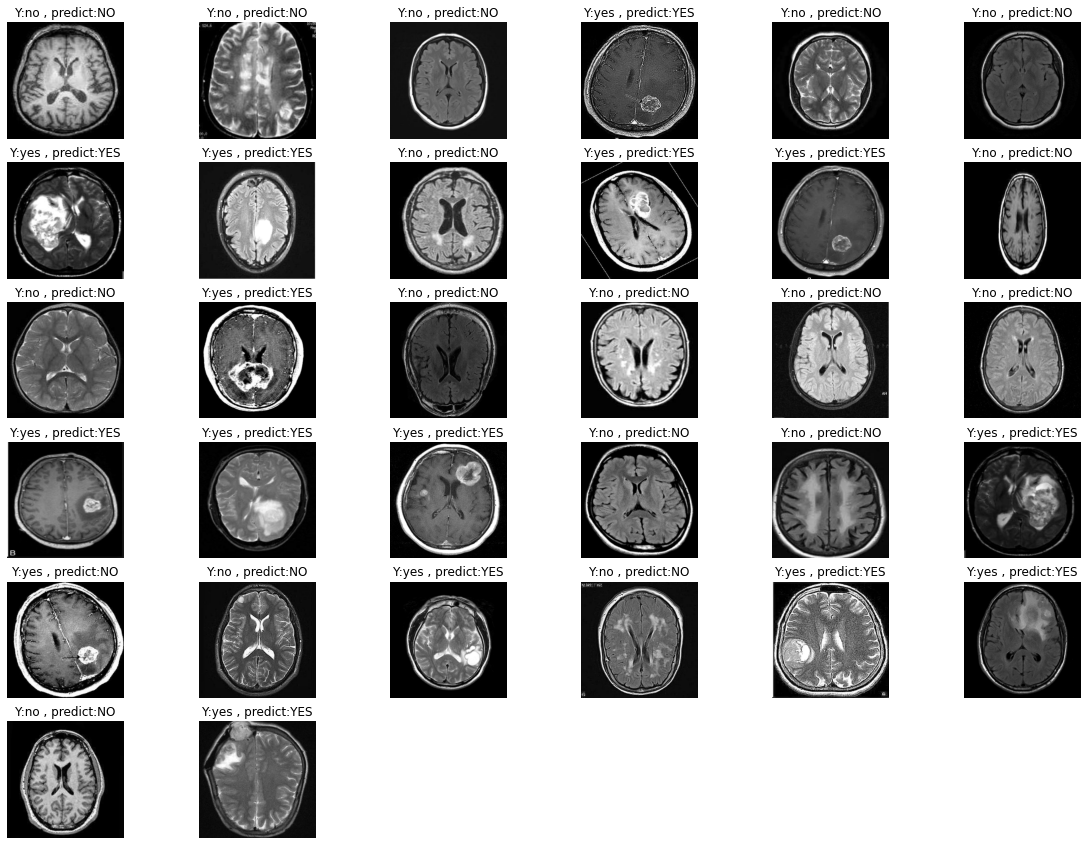

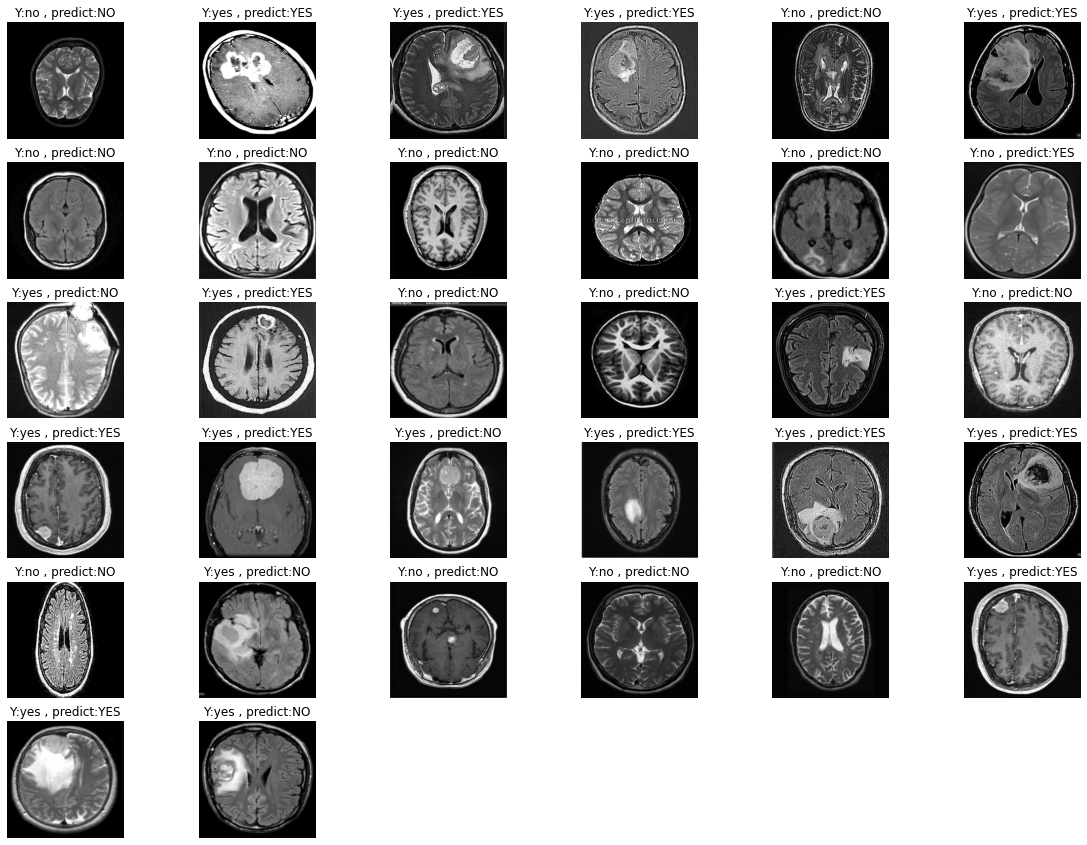

In [8]:
class_names = train_ds.class_names
for images, labels in val_ds.take(2):
    
    prediction_values = model.predict(images)
    
    prediction_label = []
    for item in prediction_values:
        if (item[0] > item[1]):
            prediction_label.append('NO')
        else:
            prediction_label.append('YES')
            
    plt.figure(figsize=(20, 15))
    for i in range(32):
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"),cmap='gray')
        plt.title("Y:{} , predict:{}".format(class_names[labels[i]],prediction_label[i]))
        plt.axis("off")

### **Plot loss and accuracy**

In this part you should plot the loss and accuracy of train and test.

In [9]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


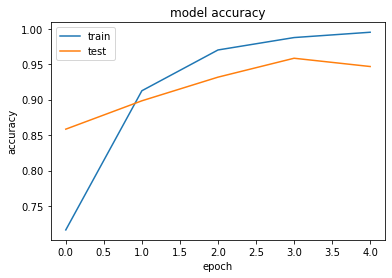

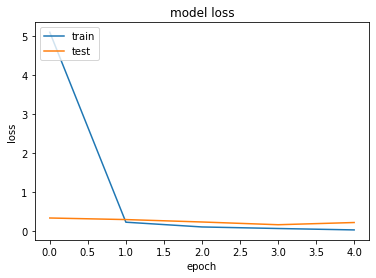

In [10]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## **2.Functional API**

### **Build a model**

In [16]:
inputs = Input(shape=(256,256,1))
x = Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),activation='relu')(inputs)
x = Conv2D(filters=16,kernel_size=(3,3),strides=(1,1),activation='relu')(x)
x = MaxPool2D(pool_size=(2,2),strides=(2,2))(x)
x = MaxPool2D(pool_size=(2,2),strides=(2,2))(x)
x = Flatten()(x)
x = Dense(32,activation='relu')(x)
outputs = Dense(2,activation='softmax')(x)

model = Model(inputs,outputs)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 256, 256, 1)]     0         
                                                                 
 conv2d_8 (Conv2D)           (None, 254, 254, 32)      320       
                                                                 
 conv2d_9 (Conv2D)           (None, 252, 252, 16)      4624      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 126, 126, 16)     0         
 2D)                                                             
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 63, 63, 16)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 63504)             0   

### **Train the model**

In [17]:
# compile
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [18]:
history = model.fit(train_ds,epochs=5,validation_data=val_ds)

Epoch 1/5
75/75 [==============================] - 166s 2s/step - loss: 8.5964 - accuracy: 0.7329 - val_loss: 0.4425 - val_accuracy: 0.7917
Epoch 2/5
75/75 [==============================] - 167s 2s/step - loss: 0.3125 - accuracy: 0.8779 - val_loss: 0.2666 - val_accuracy: 0.9183
Epoch 3/5
75/75 [==============================] - 166s 2s/step - loss: 0.1370 - accuracy: 0.9579 - val_loss: 0.1451 - val_accuracy: 0.9517
Epoch 4/5
75/75 [==============================] - 165s 2s/step - loss: 0.0527 - accuracy: 0.9850 - val_loss: 0.1560 - val_accuracy: 0.9600
Epoch 5/5
75/75 [==============================] - 167s 2s/step - loss: 0.0365 - accuracy: 0.9921 - val_loss: 0.1757 - val_accuracy: 0.9483


In [19]:
# save 
model_json = model.to_json()
with open("model_functional.json", "w") as json_file:
    json_file.write(model_json)

### **Test the model**

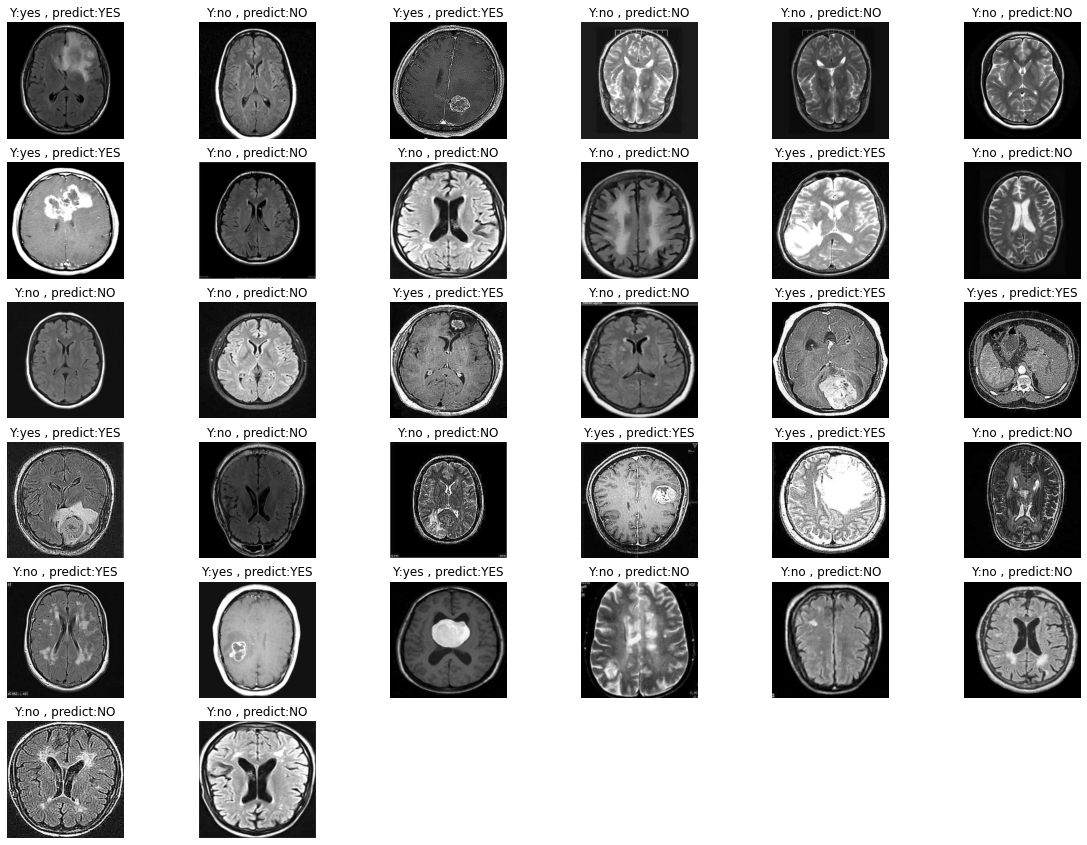

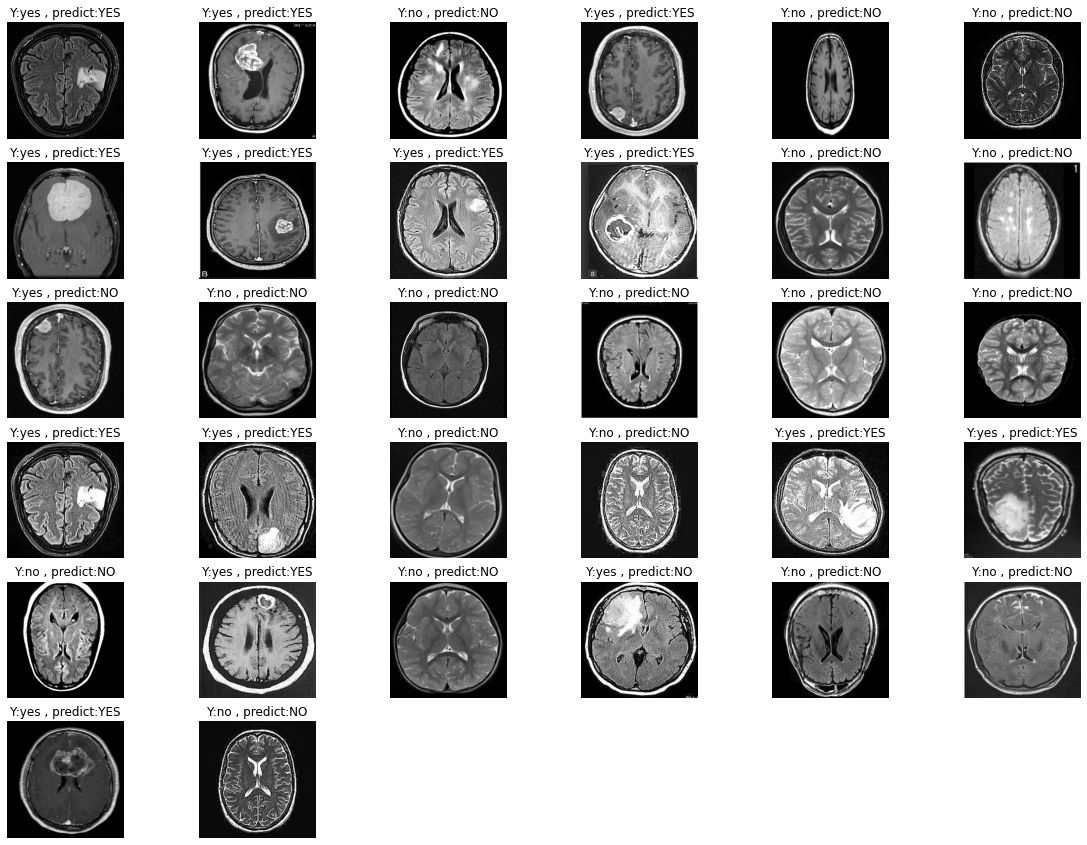

In [20]:
class_names = train_ds.class_names
for images, labels in val_ds.take(2):
    
    prediction_values = model.predict(images)
    
    prediction_label = []
    for item in prediction_values:
        if (item[0] > item[1]):
            prediction_label.append('NO')
        else:
            prediction_label.append('YES')
            
    plt.figure(figsize=(20, 15))
    for i in range(32):
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"),cmap='gray')
        plt.title("Y:{} , predict:{}".format(class_names[labels[i]],prediction_label[i]))
        plt.axis("off")

### **Plot loss and accuracy**

In this part you should plot the loss and accuracy of train and test.

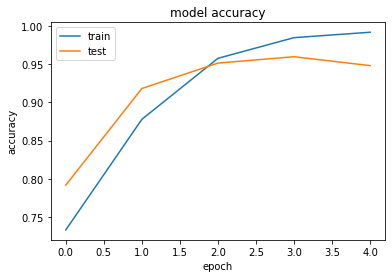

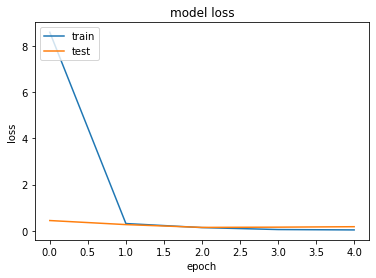

In [21]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()